In [1]:
import torchvision
import torch

In [24]:
import warnings
# to remove outdated numpy matmult errors
warnings.filterwarnings("ignore", category=DeprecationWarning, message="__array_wrap__ must accept context and return_scalar arguments")


In [2]:
transform = torchvision.transforms.Compose(
    transforms=[
    torchvision.transforms.ToTensor(),
]
)

trainset = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [4]:
print("Training images: ", len(trainloader))
print("Test images: ", len(testloader))

Training images:  15000
Test images:  2500


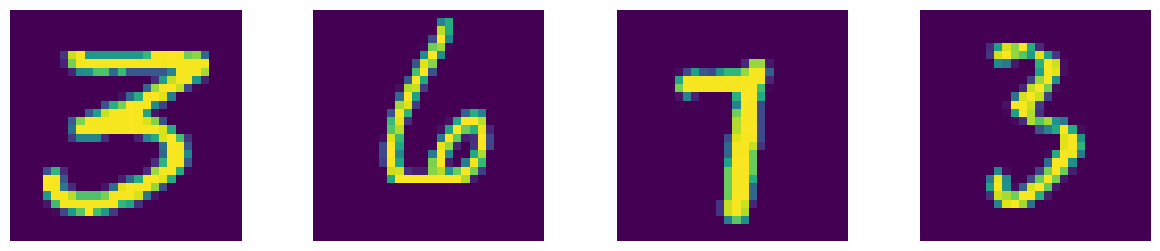

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
trainiter = iter(trainloader)
images, labels = next(trainiter)

first_batch = images[:4]


fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    reshaped = np.transpose(first_batch[i], (1,2,0))
    plt.imshow(reshaped)
    
    
    axes[i].imshow(reshaped)
    axes[i].axis('off')

plt.show()





In [16]:
print(images[0].size())
print("Min pixel: ", torch.min(images))
print("Max pixel: ", torch.max(images))

torch.Size([784])
Min pixel:  tensor(0.)
Max pixel:  tensor(1.)


In [17]:
for i, (images, labels) in enumerate(trainloader):
    images = images.view(images.size(0), -1)

In [ ]:
class Model():
    def __init__(self):
        self.w1 = np.random.randn(784,128)*0.01
        self.b1 = np.zeros(128)
        self.w2 = np.random.randn(128,10)*0.01
        self.b2 = np.zeros(10)
        
        
    def forward(self, image):
        self.z1 = image @ self.w1 + self.b1
        self.a1 = 1 / (1 + np.exp(-self.z1)) # sigmoid
        return self.a1 @  self.w2 + self.b2

    def loss(self, output, label):
        self.softmaxed = torch.softmax(output, dim=0)
        loss = -torch.log(self.softmaxed[label])

        return loss
    
    def xyz(self):
        gradient = self.softmaxed.clone()
        
    

In [ ]:
model = Model()
output = model.forward(images[0])

model.loss(output, labels[0])


tensor([0.1077, 0.1024, 0.0926, 0.1033, 0.1005, 0.1004, 0.0929, 0.0928, 0.1040,
        0.1034], dtype=torch.float64)
